In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from metpy.plots import USCOUNTIES
import geopandas
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime, date
from dateutil import tz
import glob
from shapely.geometry import shape, Polygon

In [2]:
geo = {"id": "https://api.weather.gov/alerts/NWS-IDP-PROD-4784939-3857385",
            "type": "Feature",
            "geometry": {
                "type": "Polygon",
                "coordinates": [
                    [
                        [
                            -82.609999999999999,
                            29.879999999999999
                        ],
                        [
                            -82.590000000000003,
                            29.939999999999998
                        ],
                        [
                            -82.530000000000001,
                            29.949999999999999
                        ],
                        [
                            -82.530000000000001,
                            29.93
                        ],
                        [
                            -82.560000000000002,
                            29.91
                        ],
                        [
                            -82.569999899999999,
                            29.870000000000001
                        ],
                        [
                            -82.609999999999999,
                            29.879999999999999
                        ]
                    ]
                ]
            },
            "properties": {
                "@id": "https://api.weather.gov/alerts/NWS-IDP-PROD-4784939-3857385",
                "@type": "wx:Alert",
                "id": "NWS-IDP-PROD-4784939-3857385",
                "areaDesc": "Alachua, FL; Columbia, FL",
                "geocode": {
                    "UGC": [
                        "FLC001",
                        "FLC023"
                    ],
                    "SAME": [
                        "012001",
                        "012023"
                    ]
                },
                "affectedZones": [
                    "https://api.weather.gov/zones/county/FLC001",
                    "https://api.weather.gov/zones/county/FLC023"
                ],
                "references": [
                    {
                        "@id": "https://api.weather.gov/alerts/NWS-IDP-PROD-4784603-3857205",
                        "identifier": "NWS-IDP-PROD-4784603-3857205",
                        "sender": "w-nws.webmaster@noaa.gov",
                        "sent": "2021-02-12T07:31:00-05:00"
                    }
                ],
                "sent": "2021-02-12T10:01:00-05:00",
                "effective": "2021-02-12T10:01:00-05:00",
                "onset": "2021-02-12T10:01:00-05:00",
                "expires": "2021-02-13T10:15:00-05:00",
                "ends": None,
                "status": "Actual",
                "messageType": "Update",
                "category": "Met",
                "severity": "Severe",
                "certainty": "Observed",
                "urgency": "Immediate",
                "event": "Flood Warning",
                "sender": "w-nws.webmaster@noaa.gov",
                "senderName": "NWS Jacksonville FL",
                "headline": "Flood Warning issued February 12 at 10:01AM EST by NWS Jacksonville FL",
                "description": "...The Flood Warning is extended for the following rivers in\nFlorida...\n\nSanta Fe River Near Worthington Springs affecting Alachua and\nUnion Counties.\n\n...The Flood Warning continues for the following rivers in Florida...\n\nSanta Fe River Near O'Leno State Park affecting Alachua and\nColumbia Counties.\n\nThe Flood Warning continues for\nthe Santa Fe River Near O'Leno State Park.\n* Until further notice.\n* At 9:15 AM EST Friday the stage was 43.1 feet.\n* Flood stage is 43.0 feet.\n* Minor flooding is occurring and minor flooding is forecast.\n* Forecast...The river will rise to 43.4 feet just after midnight\ntonight. It will then fall to 43.1 feet and begin rising again\nSunday morning. It will rise to 43.6 feet Monday evening. It will\nthen fall again but remain above flood stage.\n* Impact...At 43.0 feet, Access to river gage becomes limited as the\nBible Camp Road boat ramp becomes flooded and the last half mile\nof Bible Camp Road begins to flood in Columbia County. Overland\nflooding begins past the Santa Fe River sink in the park and will\ncut-off access road to south end of the park.",
                "instruction": None,
                "response": "Avoid",
                "parameters": {
                    "NWSheadline": [
                        "The Flood Warning remains in effect"
                    ],
                    "VTEC": [
                        "/O.CON.KJAX.FL.W.0004.000000T0000Z-000000T0000Z/"
                    ],
                    "EAS-ORG": [
                        "WXR"
                    ],
                    "PIL": [
                        "JAXFLSJAX"
                    ],
                    "BLOCKCHANNEL": [
                        "CMAS",
                        "EAS",
                        "NWEM"
                    ]
                }
            }
        }

In [3]:
# for d in geo:
#     geo['geometry'] = shape(geo['geometry'])

geo['geometry'] = shape(geo['geometry'])
gdf = geopandas.GeoDataFrame(geo).set_geometry('geometry')
min_max = gdf['geometry'][0].bounds
west_bound = min_max[0]
east_bound = min_max[2]
south_bound = min_max[1]
north_bound = min_max[3]

Text(0.03, 0.95, 'Inland Flood Watches')

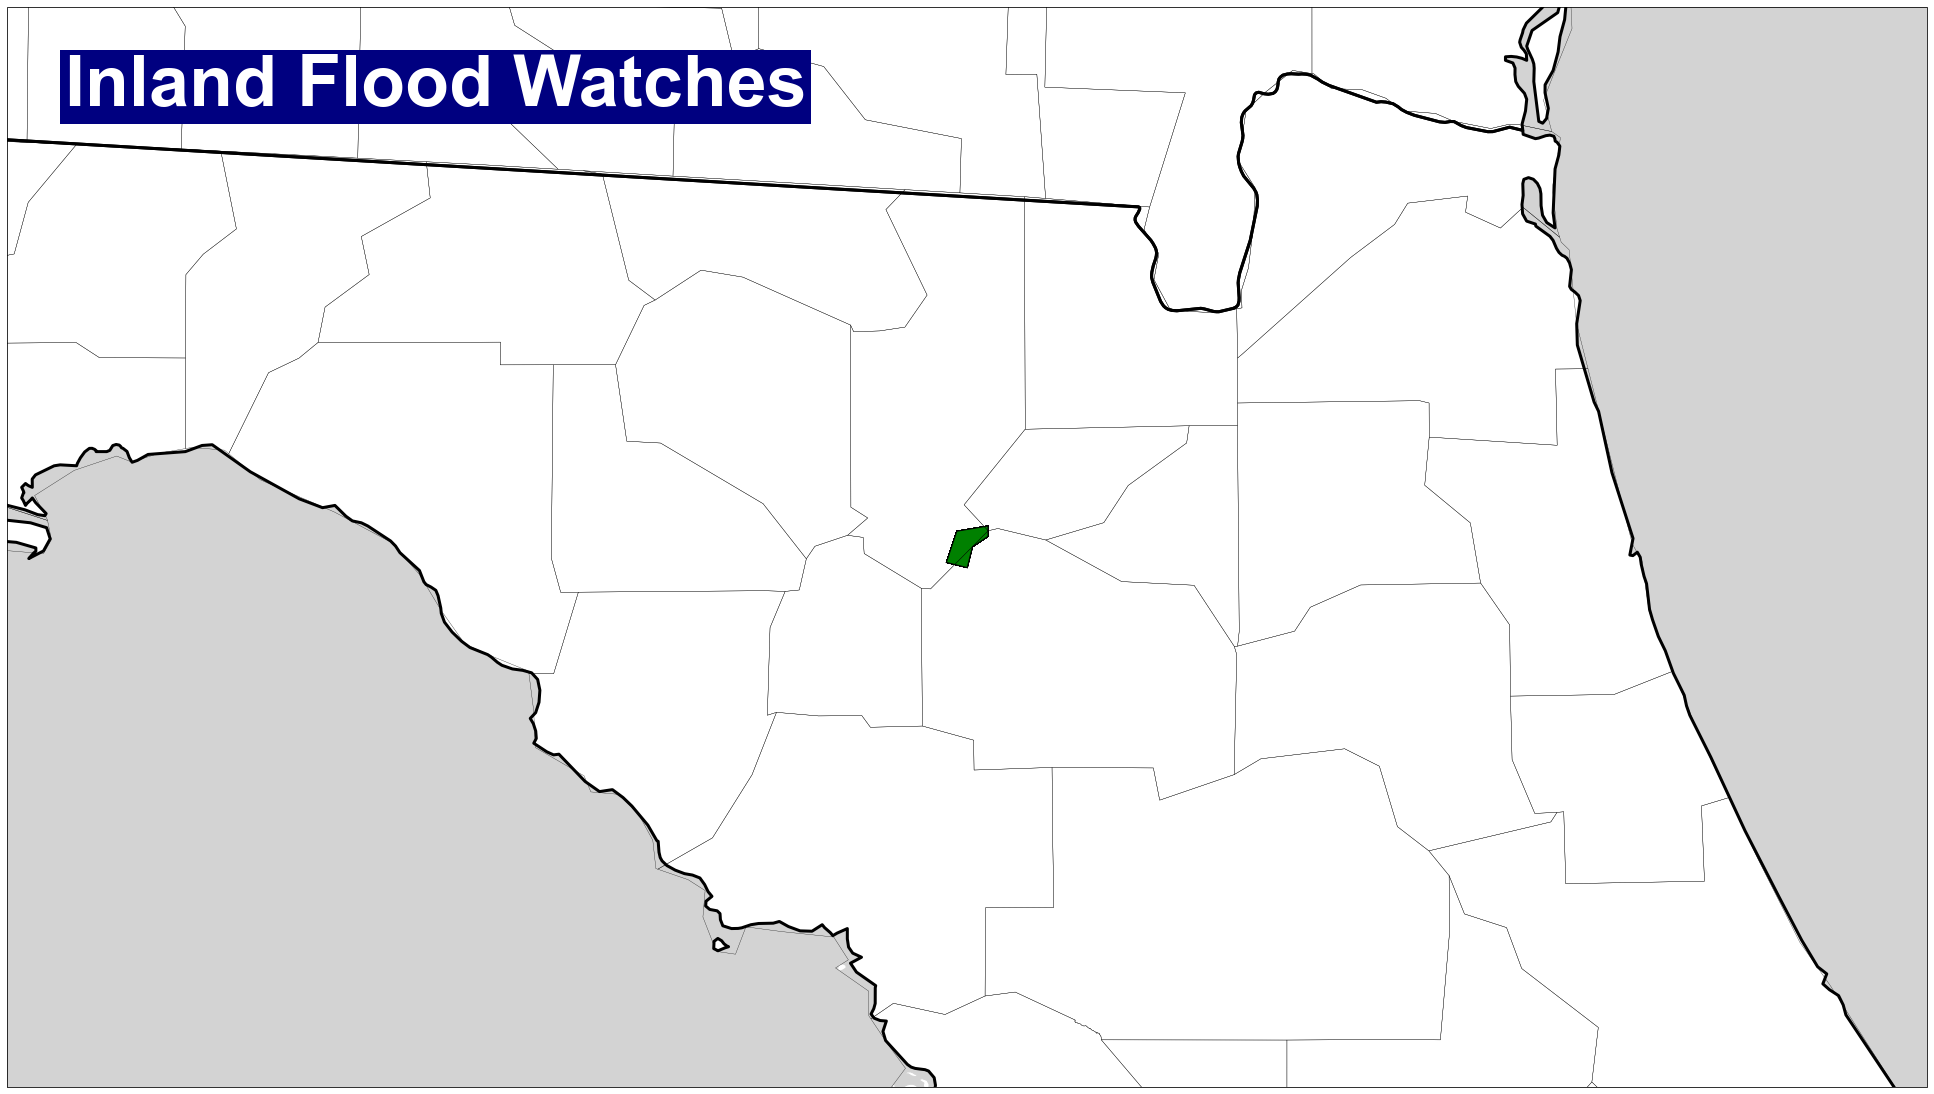

In [4]:
data_crs = ccrs.PlateCarree()
# Setup matplotlib figure
fig = plt.figure(figsize=(1920/72, 1080/72))
ax = fig.add_axes([0, 0, 1, 1], projection=data_crs)

ax.set_extent([west_bound - 1, east_bound + 1, south_bound - 1, north_bound + 1], data_crs)
ax.set_adjustable('datalim')

# Setup borders (states, countries, coastlines, etc)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
ax.add_feature(cfeature.OCEAN.with_scale('10m'), color='lightgray')
ax.add_feature(USCOUNTIES.with_scale('20m'), edgecolor='black', zorder=5, linewidth=0.3)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=3, zorder=5)

ax.add_geometries(gdf['geometry'], crs=data_crs, facecolor='green',
                  edgecolor='black', linewidth=1, zorder=1, alpha=1.0)

# Set title
ax.set_title(f'Inland Flood Watches', loc='left', 
             ha='left', va='top', fontsize=72, color='white', 
             fontweight='bold', fontname='Arial', y=0.95, x=0.03, zorder=11,
             bbox=dict(facecolor='navy', alpha=1.0, edgecolor='none'))
